In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
file1 = "./iterationTime.dat"

def iterationTime(file): 

    df = pd.read_csv(file)
    df.columns = ['One']
    df['One'] = df['One'].astype('string')
    new = df['One'].str.split(' ', expand = True) 
    df['Time']= new[0].astype('float') 
    df['Iteration']= new[1].astype('float') 
    df['ExecutionTime']= new[2].astype('float') 
    df['Residual']= new[3].astype('float') 
    df.drop(columns =['One'], inplace = True) 

    return df

filepath1 = "fine_mesh/plateHole"
file1_label = "Fine Mesh"
filepath1 = filepath1 + "/iterationTime.dat"
df_1 = iterationTime(filepath1)

filepath2 = "fine_mesh/plateHole_ML"
file2_label = "Fine Mesh ML"
filepath2 = filepath2 + "/iterationTime.dat"
df_2 = iterationTime(filepath2)

filepath3 = "coarse_mesh/plateHole"
file3_label = "Coarse Mesh"
filepath3 = filepath3 + "/iterationTime.dat"
df_3 = iterationTime(filepath3)

filepath4 = "fine_mesh/plateHole_mapFields"
file4_label = "Map Fields"
filepath4 = filepath4 + "/iterationTime.dat"
df_4 = iterationTime(filepath4)

filepath6 = "fine_mesh/plateHole_testConverged"
file6_label = "Test Converged"
filepath6 = filepath6 + "/iterationTime.dat"
df_6 = iterationTime(filepath6) 

maxTimestep = 1


/tmp/ipykernel_6341/15048057.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')


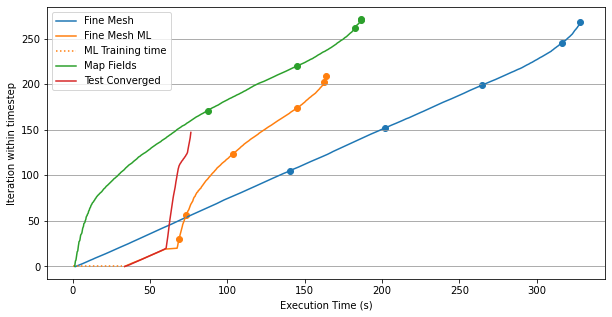

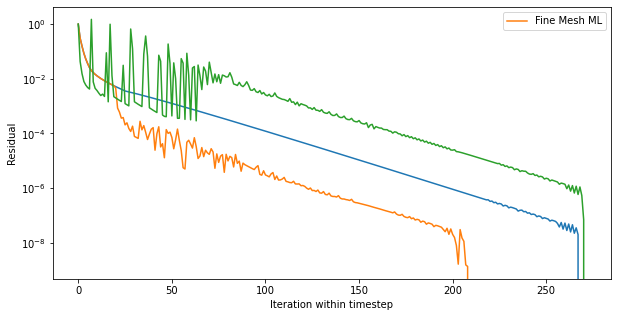

For tolerance of 1e-4
ML speed up is 0.63686293913904
Map speed up is 0.2814448292924295


For tolerance of 1e-5
ML speed up is 0.6098840940838903
Map speed up is 0.3121531317249972


For tolerance of 1e-6
ML speed up is 0.5411303330276099
Map speed up is 0.41155634270533537


For tolerance of 1e-7
ML speed up is 0.5038426349496797
Map speed up is 0.4323269289417505


Overall ML speed up = 0.5003049710277524
Overall Map speed up = 0.4323269289417505


In [178]:
training_time = 32

ML_case_time = df_2["ExecutionTime"] + training_time



plt.figure(figsize=(10,5))
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
# 1
plt.plot(df_1["ExecutionTime"], df_1["Iteration"], label = file1_label) 
# 2
ML_case_time = df_2["ExecutionTime"] + training_time
# 3
plt.plot(ML_case_time, df_2["Iteration"],  label = file2_label) 
# 4
plt.plot(np.arange(0, training_time + 1), np.zeros(training_time + 1), label = "ML Training time", c = "C1", linestyle = ":")
# 5
plt.plot(df_4["ExecutionTime"], df_4["Iteration"], label = file4_label) 
# 6
ML_case_time_no_testConverged = df_6["ExecutionTime"] + training_time
plt.plot(ML_case_time_no_testConverged, df_6["Iteration"], label = file6_label) 


# Time scatter

interval=1e-4
residual_scatter = np.array([])
for i in np.arange(0, len(df_1["Iteration"])):

    if df_1["Residual"][i] < interval:
        residual_scatter = np.append(residual_scatter, i)
        interval = interval*1e-1

residual_scatter_1 = residual_scatter
plt.scatter(df_1["ExecutionTime"][residual_scatter_1], df_1["Iteration"][residual_scatter_1], c="C0") 

interval=1e-4
residual_scatter = np.array([])
for i in np.arange(0, len(df_2["Iteration"])):

    if df_2["Residual"][i] < interval:
        residual_scatter = np.append(residual_scatter, i)
        interval = interval*1e-1

residual_scatter_2 = residual_scatter
plt.scatter(ML_case_time[residual_scatter_2], df_2["Iteration"][residual_scatter_2], c="C1") 

interval=1e-4
residual_scatter = np.array([])
for i in np.arange(0, len(df_4["Iteration"])):

    if df_4["Residual"][i] < interval:
        residual_scatter = np.append(residual_scatter, i)
        interval = interval*1e-1

residual_scatter_4 = residual_scatter
plt.scatter(df_4["ExecutionTime"][residual_scatter_4], df_4["Iteration"][residual_scatter_4], c="C2") 


plt.xlabel("Execution Time (s)")
plt.ylabel("Iteration within timestep")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df_1["Iteration"], df_1["Residual"]) 
plt.plot(df_2["Iteration"], df_2["Residual"],  label = file2_label) 
# plt.plot(df_3["Iteration"], df_3["Residual"],  label = file3_label) 
plt.plot(df_4["Iteration"], df_4["Residual"]) 
# plt.plot(df_5["Iteration"], df_5["Residual"],  label = file5_label) 

plt.xlabel("Iteration within timestep")
plt.ylabel("Residual")
plt.yscale("log")
plt.legend()
plt.show()


for i in np.arange(1, 5):
    
    print("For tolerance of 1e-" + str(i+3))
    print("ML speed up is " + str((np.array(df_1["ExecutionTime"][residual_scatter_1])[i] - np.array(ML_case_time[residual_scatter_2])[i])/np.array(df_1["ExecutionTime"][residual_scatter_1])[i]) )
    print("Map speed up is " + str((np.array(df_1["ExecutionTime"][residual_scatter_1])[i] - np.array(df_4["ExecutionTime"][residual_scatter_4])[i])/np.array(df_1["ExecutionTime"][residual_scatter_1])[i]) )
    print("\n")
i = -1
print("Overall ML speed up = " + str((np.array(df_1["ExecutionTime"])[i] - np.array(ML_case_time)[i])/np.array(df_1["ExecutionTime"])[i]))
print("Overall Map speed up = " + str((np.array(df_1["ExecutionTime"])[i] - np.array(df_4["ExecutionTime"])[i])/np.array(df_1["ExecutionTime"])[i]))